In [89]:
import pandas as pd
import numpy as np
import seaborn as sns

In [74]:
df = pd.read_excel("./datos_aleatorios_temperatura02.xlsx")
df.head()

,Fecha,Hora,Temperatura,Ciudad
0,2024-07-27,13:29:16,20.49,Tokio
1,2024-03-31,13:29:16,21.78,Paris
2,2023-12-31,13:29:16,20.42,Londres
3,2023-11-22,13:29:16,-9.13,Nueva York
4,2024-06-28,13:29:16,26.03,Buenos Aires


#### Convirtiendo columnas de fecha y hora a un formato datetime

In [75]:
df["Fecha"] = pd.to_datetime(df["Fecha"], format="%Y-%m-%d")
print(type(df["Fecha"][0]))
# Hora ya está en datetime
print(type(df["Hora"][0]))
df.head()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'datetime.time'>


,Fecha,Hora,Temperatura,Ciudad
0,2024-07-27,13:29:16,20.49,Tokio
1,2024-03-31,13:29:16,21.78,Paris
2,2023-12-31,13:29:16,20.42,Londres
3,2023-11-22,13:29:16,-9.13,Nueva York
4,2024-06-28,13:29:16,26.03,Buenos Aires


#### Agrupando datos por año, mes y ciudad

In [76]:
# Agrupación de datos por año, mes y ciudad

df["Año"] = df["Fecha"].dt.year
df["Mes"] = df["Fecha"].dt.month
df.head()

,Fecha,Hora,Temperatura,Ciudad,Año,Mes
0,2024-07-27,13:29:16,20.49,Tokio,2024,7
1,2024-03-31,13:29:16,21.78,Paris,2024,3
2,2023-12-31,13:29:16,20.42,Londres,2023,12
3,2023-11-22,13:29:16,-9.13,Nueva York,2023,11
4,2024-06-28,13:29:16,26.03,Buenos Aires,2024,6


#### Calculando promedio anual de temperatura por ciudad

<Axes: xlabel='Ciudad', ylabel='Temperatura'>

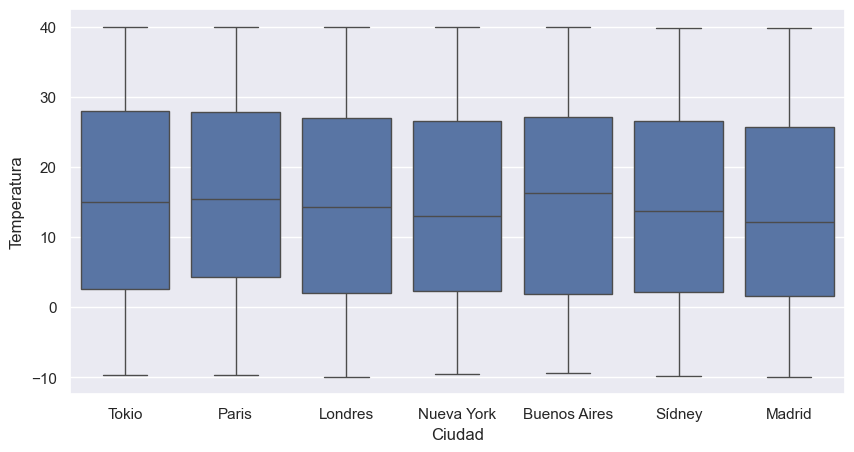

In [92]:
# Calculando promedio anual de temperatura por ciudad

df.groupby(["Ciudad", "Año"])["Temperatura"].mean()

sns.boxplot(x="Ciudad", y="Temperatura", data=df)






c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


                               SARIMAX Results                                
Dep. Variable:            Temperatura   No. Observations:                  207
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -814.322
Date:                Mon, 07 Oct 2024   AIC                           1640.643
Time:                        12:52:32   BIC                           1660.611
Sample:                             0   HQIC                          1648.719
                                - 207                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9609      0.066    -14.668      0.000      -1.089      -0.832
ar.L2         -0.8998      0.093     -9.629      0.000      -1.083      -0.717
ar.L3         -0.7634      0.101     -7.522      0.0

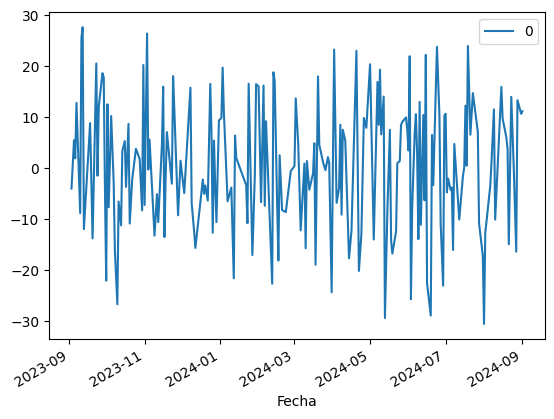

In [87]:
# Modelo de series temporales (ARIMA O SARIMA) para capturar tendencias y patrones estacionales en los datos

from statsmodels.tsa.arima.model import ARIMA

# Seleccionar datos de una ciudad
df_tokio = df[df["Ciudad"] == "Tokio"]
df_tokio = df_tokio.groupby("Fecha")["Temperatura"].mean().reset_index()
df_tokio = df_tokio.set_index("Fecha")

# Crear modelo ARIMA
modelo = ARIMA(df_tokio, order=(5,1,0))
modelo_fit = modelo.fit()
print(modelo_fit.summary())

# Gráfica de los residuos
residuals = pd.DataFrame(modelo_fit.resid)
residuals.plot()


# Predicciones
print("-----------------------------------------")
predicciones = modelo_fit.forecast(steps=12)
print(predicciones)



